In [2]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('spam.csv' ,  encoding='latin-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

### Cleaning the data


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
df= df.drop(columns=['Unnamed: 2','Unnamed: 3' , 'Unnamed: 4'])

In [14]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#renaming the columns

In [13]:
df.rename(columns={'v1' : 'target' , 'v2' : 'text'} , inplace=True)

In [15]:
from sklearn.preprocessing import LabelEncoder

In [18]:
encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target'])

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
#duplicates

df.duplicated().sum()

403

In [21]:
#removing the duplicates

df = df.drop_duplicates(keep='first')

In [24]:
df.shape

(5169, 2)

### EDA

In [26]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [27]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x147b443c530>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

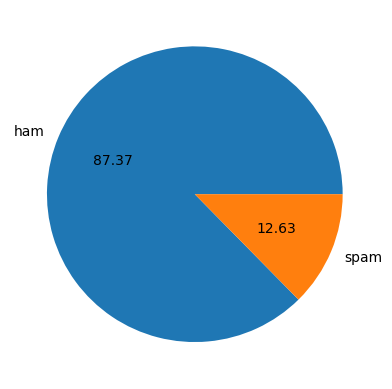

In [29]:
plt.pie(df['target'].value_counts() , labels =['ham','spam'] , autopct='%0.2f')

In [30]:
#our data is imbalanced

In [31]:
import nltk

In [32]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\itsam\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [36]:
df['num_char'] = df['text'].apply(len)

In [37]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [38]:
#number of words

In [51]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [52]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [53]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [54]:
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [55]:
df[['num_char' , 'num_words' ,'num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [58]:
df[df['target']==0][['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [59]:
df[df['target']==1][['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [60]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

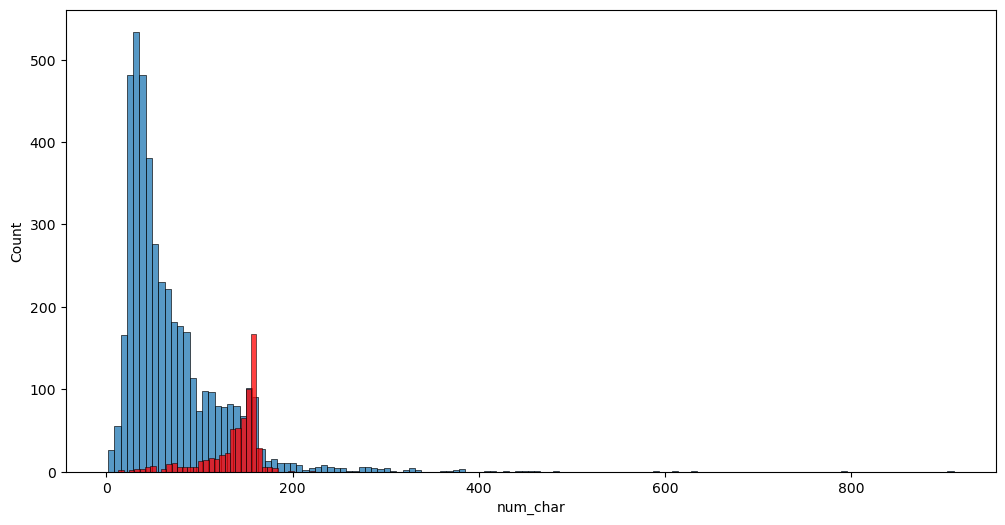

In [65]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

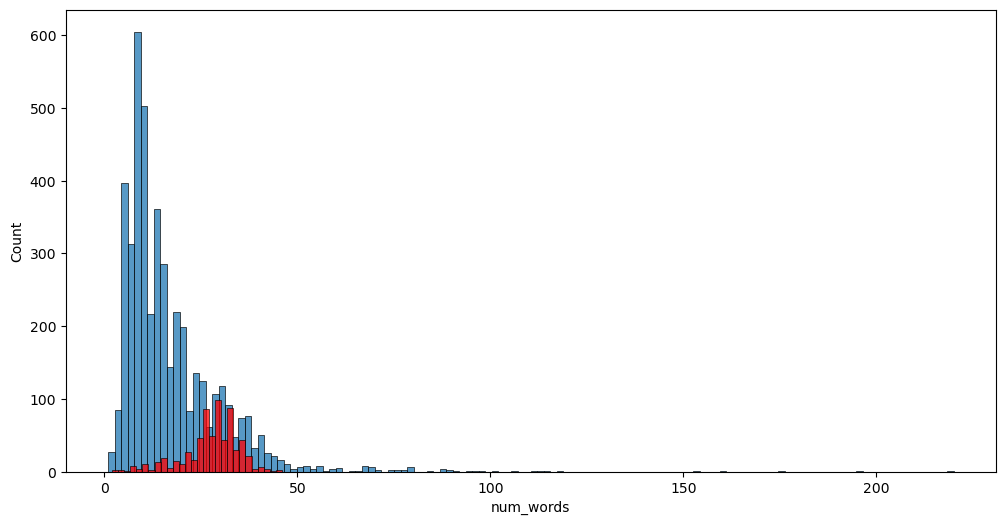

In [66]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

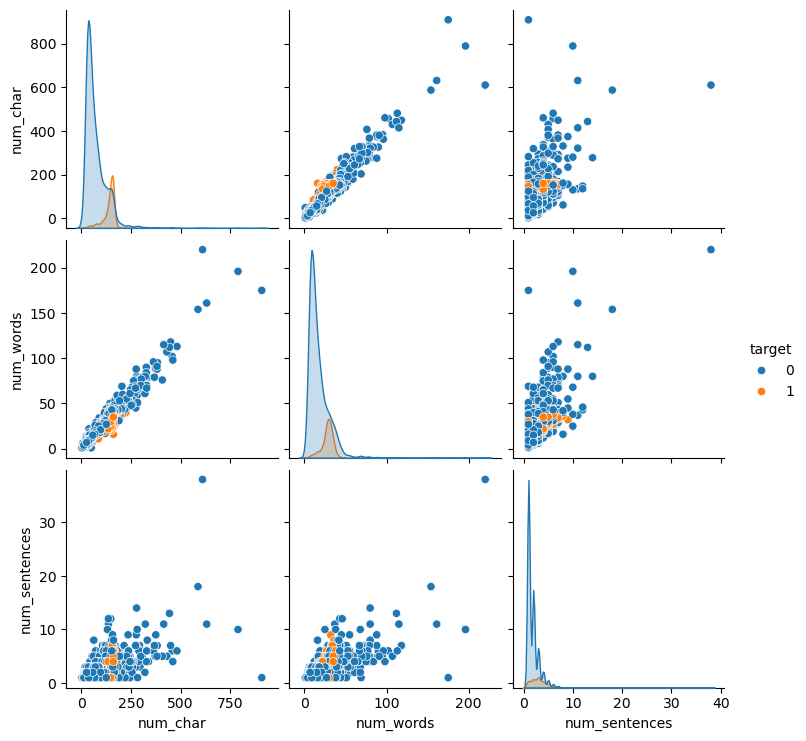

In [67]:
sns.pairplot(df,hue='target')

In [70]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_columns].corr()

correlation_matrix

,num_char,num_words,num_sentences
num_char,1.000000,0.965760,0.624139
num_words,0.965760,1.000000,0.679971
num_sentences,0.624139,0.679971,1.000000


<Axes: >

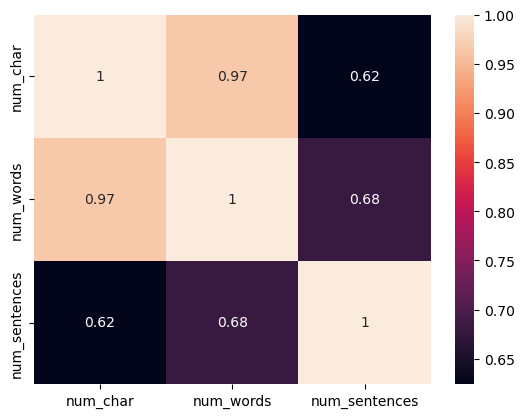

In [71]:
sns.heatmap(correlation_matrix,annot=True)

### Text Preprocesing
1. Lower Case
2. Tokenisation
3. Removing special characters
4. Removing stop words and puncutation
5. stemming

In [87]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text) 
    y = []
    for i in text:
        if i.isalnum():   #isalnum -- is alpha numeric
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: 
            y.append(i)  


    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

        
    return " " .join(y)  

In [89]:
# transform_text('I am doing machine learning')

'machin learn'

In [86]:
# from nltk.stem.porter import PorterStemmer
# ps = PorterStemmer()
# ps.stem('loving')

'love'

In [91]:
df['transformed_text'] = df['text'].apply(transform_text)

In [92]:
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [97]:
from wordcloud import WordCloud
wc = WordCloud(width=500 , height=500, min_font_size=10,background_color='white')

In [98]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

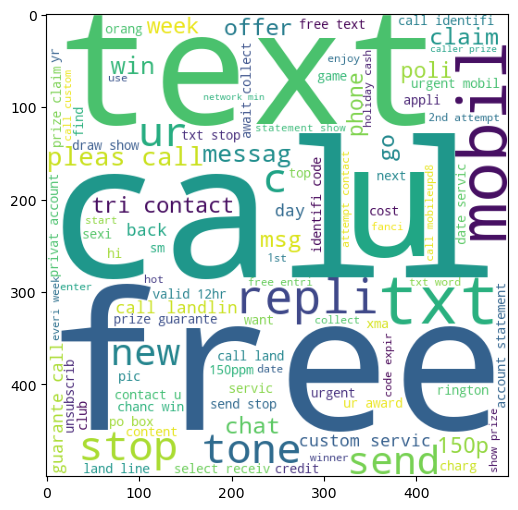

In [102]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [103]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

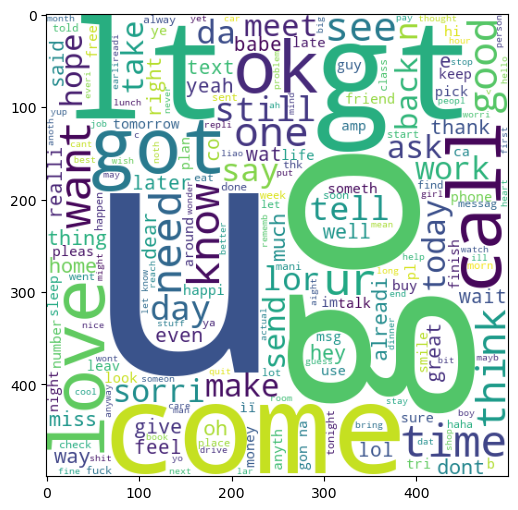

In [104]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [105]:
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [107]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [108]:
len(spam_corpus)

9939

In [111]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

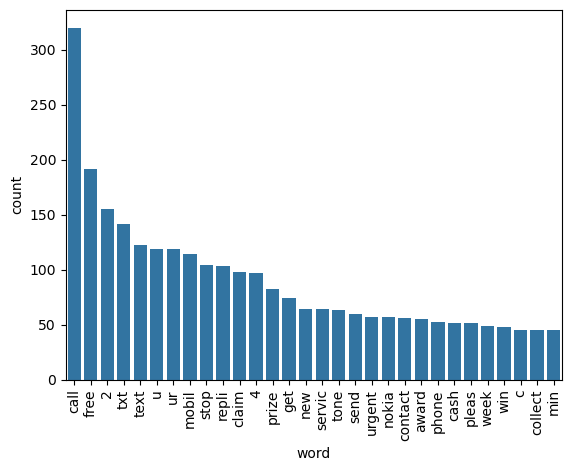

In [120]:
df_spam_corpus = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

sns.barplot(x='word', y='count', data=df_spam_corpus)

plt.xticks(rotation='vertical')
plt.show()

In [121]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [122]:
len(ham_corpus)

35404

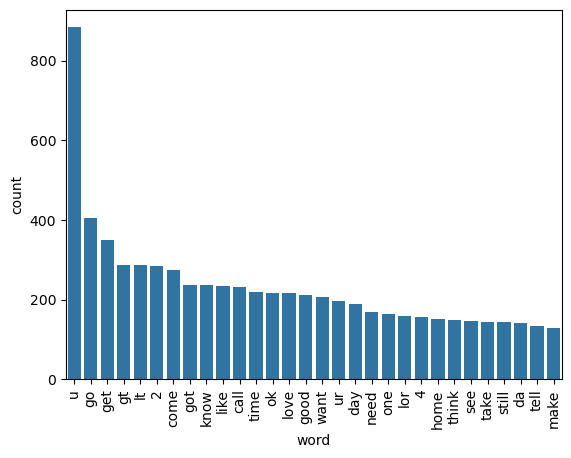

In [123]:
df_ham_corpus = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

sns.barplot(x='word', y='count', data=df_ham_corpus)

plt.xticks(rotation='vertical')
plt.show()

### Building Our Model

In [153]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [154]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [155]:
X.shape

(5169, 3000)

In [156]:
y = df['target'].values

In [157]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [160]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [161]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [162]:
gnb.fit(X_train ,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test ,y_pred1))
print(confusion_matrix(y_test ,y_pred1))
print(precision_score(y_test , y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [163]:
mnb.fit(X_train ,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test ,y_pred2))
print(confusion_matrix(y_test ,y_pred2))
print(precision_score(y_test , y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [164]:
bnb.fit(X_train ,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test ,y_pred3))
print(confusion_matrix(y_test ,y_pred3))
print(precision_score(y_test , y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
# tfidf > mnb(precision score)

In [166]:
import pickle

In [167]:
pickle.dump(tfidf,open('vectorizer.pkl' , 'wb'))
pickle.dump(mnb,open('model.pkl' , 'wb'))